In [16]:
import tensorflow as tf
import matplotlib.pyplot as plt
tf.__version__

'1.10.0'

In [17]:
mnist = tf.keras.datasets.mnist # 28x28 images of handwritten digits
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [18]:
# Normalizing data. Mappind data from 0 to 1
x_train = tf.keras.utils.normalize(x_train,axis = 1 )
x_test = tf.keras.utils.normalize(x_test,axis = 1 )

In [19]:
model = tf.keras.models.Sequential()

#input layer
model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

#Output Layer: Number of neurons = number of classes.
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
              metrics = (['accuracy'])
             )
model.fit(x_train, y_train, epochs=3)


Epoch 1/3
60000/60000 [==============================] - 6s 94us/step - loss: 0.2647 - acc: 0.9228
Epoch 2/3
60000/60000 [==============================] - 5s 80us/step - loss: 0.1091 - acc: 0.9663
Epoch 3/3
60000/60000 [==============================] - 5s 80us/step - loss: 0.0743 - acc: 0.9768


In [20]:
#Evaluation on test data
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_acc)
print(val_loss)

10000/10000 [==============================] - 0s 31us/step
0.9742
0.08395430294852704


In [6]:
model.save('num_recog.model')

In [21]:
new_model = tf.keras.models.load_model('num_recog.model')
predictions = new_model.predict(x_test)
print(predictions)

[[1.2479072e-10 6.2311344e-08 3.0191770e-06 ... 9.9998593e-01
  6.2031811e-09 6.0948029e-09]
 [3.0442937e-08 1.7447026e-03 9.9825186e-01 ... 1.9736686e-09
  2.8757940e-08 1.2009175e-11]
 [4.3204395e-08 9.9982786e-01 4.1533262e-06 ... 1.4006486e-04
  8.2121433e-06 4.2122727e-07]
 ...
 [6.8478371e-08 6.0814949e-07 1.2828778e-07 ... 4.2044016e-05
  4.4115377e-06 1.4628288e-04]
 [4.8146849e-05 8.3155592e-06 3.0715574e-07 ... 1.3322827e-07
  2.7594762e-03 5.0751918e-08]
 [1.5723506e-05 1.4558947e-07 4.4280496e-06 ... 4.1055079e-09
  1.1568831e-06 3.0555274e-08]]


In [11]:
import numpy as np
print(np.argmax(predictions[0]))

7


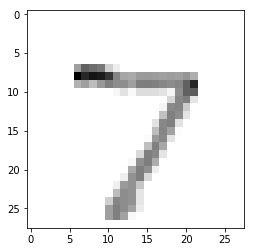

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [23]:
plt.imshow(x_test[0],cmap=plt.cm.binary)
plt.show()
print(x_test[0])

In [5]:
import sys
#sys.path.remove('/opt/ros/kinetic/lib/python2.7/dist-packages')
import cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [12]:
img = cv2.imread('../static/4.png',cv2.IMREAD_GRAYSCALE)
img = cv2.bitwise_not(img)
img = cv2.resize(img, (28, 28))
img = img / 255.0
plt.imshow(img,cmap=plt.cm.binary)
plt.show()
img = img.reshape(-1,28, 28)  # This shape works. I don't know why
#print(img)

TypeError: unsupported operand type(s) for /: 'NoneType' and 'float'

In [8]:
new_model = tf.keras.models.load_model('num_recog.model')
predictions = new_model.predict(img)

In [9]:
print(predictions)
print(np.argmax(predictions))

[[5.7624796e-08 1.6696281e-03 7.8909279e-09 1.9677445e-04 2.2332197e-04
  2.0298365e-05 3.0558670e-07 3.9991795e-05 1.7750941e-07 9.9784946e-01]]
9
